In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import beta, norm

plt.rcParams.update({"text.usetex": True, 'font.size': 18, 'font.family': 'serif'})



In [23]:
def cdf(series: pd.Series) -> pd.DataFrame:
    """ calculates the cumulative distribution function of the given series"""
    return pd.DataFrame.from_dict({
        series.name: np.append(series.sort_values(), series.max()),
        "cdf": np.linspace(0, 1, len(series) + 1)
    })


In [14]:
ROUNDS = 10_000
N = 17000  # Network size
K = 20  # k-bucket size

u = np.random.uniform(0, 1, (ROUNDS, N)) # Random draws
u_sort = np.sort(u)

In [21]:
means = u_sort[:,:20].mean(axis=1)

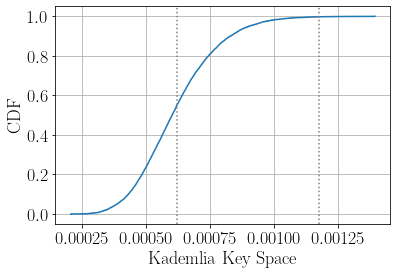

In [47]:
fig, ax = plt.subplots()

cdf_df = cdf(pd.Series(data=means, name="means"))
ax.step(cdf_df["means"], cdf_df["cdf"])
ax.axvline((K)/(N+1), color='gray', linestyle=':')

mmeans = []
for k in range(1, K+1):
    mmeans += [k/(N+1)]

ax.axvline(np.mean(mmeans), color='gray', linestyle=':')

ax.set_xlabel("Kademlia Key Space"); ax.grid(); ax.set_ylabel("CDF");

In [48]:
np.mean(mmeans)

0.0006176107287806599